In [22]:
from iminuit import Minuit
import numpy as np
import math
from math import*
%matplotlib inline
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

## Binned maximum likelihood fit:

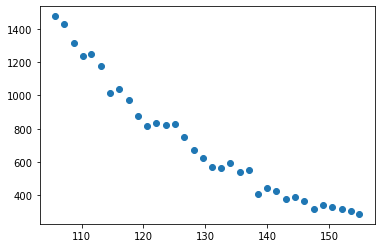

In [23]:
data = np.loadtxt('cms_mass_events_2012_data_w.txt')
plt.scatter(data[:,0],data[:,1])

In [26]:
def nll1(a0,b):
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    n = (data[:,1])
    r1 = len(n)
    f=0
    for i in range(r1): 
        f_i = (a0*math.e**(-b*x[i]) + b*n[i]*x[i] - n[i]*math.log(a0) + n[i]*math.log(n[i]) - n[i])
        f = f + f_i
    print(f,a0,b)
    return f

In [27]:
m = Minuit(nll1,a0=56000,b=0.03)
#m.limits["a0"]=(50000,100000)
m.migrad()  # find minimum
m.hesse()

4490.77924072716 56000.0 0.03
4496.551845606842 56018.240639523276 0.03
4485.009208170637 55981.759360476724 0.03
4469.026297053879 56000.0 0.030009817490828993
4512.595268030438 56000.0 0.029990182509171005
4486.766259934157 56000.0 0.030001808991031307
4494.794363367131 56000.0 0.02999819100896869
11904.03070382749 15074.91485585228 0.03339024387060882
135.54741862757191 40977.50666173406 0.03124446695179572
135.69337062010595 40980.39409114408 0.03124446695179572
135.40158701467294 40974.61923232405 0.03124446695179572
135.65445607439096 40979.6244611571 0.03124446695179572
135.44044593976105 40975.388862311025 0.03124446695179572
135.46211991985456 40977.50666173406 0.031244782357096178
135.6327580077002 40977.50666173406 0.031244151546495263
53.092112476857665 37729.67552574425 0.03136361965007186
50.486726826411314 38177.76606676484 0.03134718061897724
50.48546347415299 38179.06721793935 0.03134718061897724
50.48801834020628 38176.464915590324 0.03134718061897724
50.4845565657499

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 30.4                       │              Nfcn = 88               │
│ EDM = 1.06e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │   55e3    │    5e3    │            │            │         │         │       │
│ 1 │ b    │  34.3e-3  │  0.7e-3   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────────┐
│    │        a0         b │
├────┼─────────────────────┤
│ a0 │  2.09e+07 3.0290344 │
│  b │ 3.0290344  4.45e-07 │
└────┴─────────────────────┘

In [28]:
a0_fit = m.values["a0"]
b_fit = m.values["b"]
print(a0_fit,b_fit)

55218.599061792884 0.034320979926117275


[105.68236329 107.15852501 108.72931513 110.20382034 111.58431833
 113.15759322 114.62754301 116.10722482 117.58214415 119.15417666
 120.62951012 122.10898487 123.5868031  125.06544959 126.53995479
 128.11281556 129.58877021 131.0645178  132.5425431  134.02263904
 135.59674219 137.07580281 138.54678791 140.02709092 141.50449502
 142.98044967 144.55807292 146.03547702 147.51122461 148.99111349
 150.56728728 152.04531258 153.52313081 154.90197229]


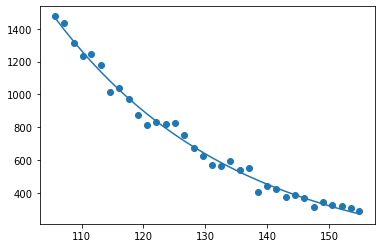

In [29]:
data = np.loadtxt('cms_mass_events_2012_data_w.txt')
x = (data[:,0])
n2 = (data[:,1])
r = len(x)
y = []
print(x)
def f(t):
    return(a0_fit*exp(-b_fit*t))
for i in range(r):
    y.append(f(x[i]))
plt.plot(x,y)
plt.scatter(x,n2)
#plt.savefig('fit-bkgd-exp-cms-calib-binned-2.png')

In [30]:
chisq=0
data = np.loadtxt('cms_mass_events_2012_data_w.txt')
x = (data[:,0])
r = len(x)
n = data[:,1]
f=0      

for i in range(r): 
    f_i = a0_fit*e**(-b_fit*x[i])
    chisq_i = (f_i - n[i])**2/(f_i)
    chisq += chisq_i
    f = f + (f_i - n[i]*math.log(f_i) + n[i]*math.log(n[i]) - n[i])
print(chisq/r)    

1.7756600903378927


In [31]:
def f2(t): #fit func: a0_fit*exp(-b*x), fit values obtained from fitting data with fit func.
    a0_fit = 55270.254795519795
    b_fit = 0.0343335798096782
    return (a0_fit*e**(-b_fit*t))

#functions to create and store toy datasets:    
def num1(): #create toy data by introducing Poisson fluctuation in the bkgd fit model
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    y=[]
    for i in range(r):
        y.append(f2(x[i]))
    n = np.random.poisson(lam=(y), size=(34)) 
    np.savetxt('toy_data_bkg_local_f.txt',n)
    #print(n)
    return n
def num2(): #store the toy data
    n=[]
    dat = np.loadtxt('toy_data_bkg_local_f.txt')
    for i in dat:
        n.append(i)
    #print("num2",n)  
    return n

In [32]:
def nll1(a0,b): #neg-log-likelihood func for toy data generated from bkgd only fit with an exp
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x)
    n = num2() 
    f=0       
    #i>14 to i<=24 sig-reg
    for i in range(r): 
        f_i = a0*e**(-b*x[i])
        n_i = math.floor(n[i])
        if(f_i<=0):
           print("f_i",f_i)
        f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    return f

def nll3(n,a0,b): #calculates neg-log-likelihood and chisq for exp fit
    lchi=[]
    chisq=0
    data = np.loadtxt('cms_mass_events_2012_data_w.txt')
    x = (data[:,0])
    r = len(x) 
    f=0       

    for i in range(r): 
           n_i = math.floor(n[i])
           f_i = a0_fit*e**(-b_fit*x[i])
           chisq_i = (f_i - n[i])**2/(f_i)
           chisq += chisq_i
           f = f + (f_i - n[i]*math.log(f_i) + n_i*math.log(n_i) - n_i)
    lchi.append(f)
    lchi.append(chisq/32)       
    return lchi


In [33]:
chi1=[]
fit_a0_exp=[]
fit_b_exp=[]
neg_like_exp=[]
k_exp=0
ka_exp=0
for i in range(10000000):
    n=num1()  #generate the toy data
    m=Minuit(nll1,a0=50000,b=0.03) #minimize toy data, fit func: a0*exp(-b*x)
    m.migrad()
    m.hesse()
    print('exp-valid-acc',m.valid,m.accurate)
    if(m.valid*m.accurate):
      ka_exp=ka_exp+1
      a0_fit_exp = m.values["a0"]
      b_fit_exp = m.values["b"]
    
      lchi1 = nll3(n,a0_fit_exp,b_fit_exp)
      nl1 = lchi1[0]
      chi1.append(lchi1[1]) 
      fit_a0_exp.append(a0_fit_exp)
      fit_b_exp.append(b_fit_exp)
      print("i",i,"toy data generated and fitted values are",a0_fit_exp,b_fit_exp)  
    
      if(ka_exp >= 1000):
        break

exp-valid-acc True True
i 0 toy data generated and fitted values are 55211.830814143665 0.034249212418530094
exp-valid-acc True True
i 1 toy data generated and fitted values are 53471.69754416528 0.034077677709243914
exp-valid-acc True True
i 2 toy data generated and fitted values are 52874.37067986169 0.033983533514927604
exp-valid-acc True True
i 3 toy data generated and fitted values are 55989.00256514371 0.03443735867074158
exp-valid-acc True True
i 4 toy data generated and fitted values are 58938.3902590498 0.03488946011423136
exp-valid-acc True True
i 5 toy data generated and fitted values are 53520.26864950454 0.03409677644621178
exp-valid-acc True True
i 6 toy data generated and fitted values are 56036.00347337276 0.03456098553160993
exp-valid-acc True True
i 7 toy data generated and fitted values are 59714.502104314626 0.034937965934788866
exp-valid-acc True True
i 8 toy data generated and fitted values are 55383.49843581257 0.0344167416771127
exp-valid-acc True True
i 9 toy d

exp-valid-acc True True
i 76 toy data generated and fitted values are 50471.84579995682 0.03361816589446237
exp-valid-acc True True
i 77 toy data generated and fitted values are 50254.22575562683 0.033553379871293344
exp-valid-acc True True
i 78 toy data generated and fitted values are 59830.27769859947 0.03501438918665021
exp-valid-acc True True
i 79 toy data generated and fitted values are 59701.822584874535 0.03510985210301502
exp-valid-acc True True
i 80 toy data generated and fitted values are 54245.2248618837 0.03420867075332503
exp-valid-acc True True
i 81 toy data generated and fitted values are 54047.510697452075 0.03412895053074154
exp-valid-acc True True
i 82 toy data generated and fitted values are 53823.42392688803 0.03415264656606084
exp-valid-acc True True
i 83 toy data generated and fitted values are 54382.81684915692 0.034192064597395336
exp-valid-acc True True
i 84 toy data generated and fitted values are 56724.31783570571 0.03451438855047845
exp-valid-acc True True
i

exp-valid-acc True True
i 154 toy data generated and fitted values are 49540.060084174445 0.033481340674350615
exp-valid-acc True True
i 155 toy data generated and fitted values are 55489.76226057586 0.03433420631319946
exp-valid-acc True True
i 156 toy data generated and fitted values are 57507.30676558244 0.03465879335856614
exp-valid-acc True True
i 157 toy data generated and fitted values are 52210.1255479531 0.03393451466610181
exp-valid-acc True True
i 158 toy data generated and fitted values are 50767.30361823829 0.03368154705797817
exp-valid-acc True True
i 159 toy data generated and fitted values are 48888.93894854158 0.03335884432771718
exp-valid-acc True True
i 160 toy data generated and fitted values are 51794.81423792711 0.03384926223898657
exp-valid-acc True True
i 161 toy data generated and fitted values are 56983.87705209065 0.03459546340402866
exp-valid-acc True True
i 162 toy data generated and fitted values are 49914.54683611985 0.033459199785530615
exp-valid-acc Tru

exp-valid-acc True True
i 236 toy data generated and fitted values are 53896.289540599726 0.03412157204021667
exp-valid-acc True True
i 237 toy data generated and fitted values are 60277.262567120066 0.035057737034518435
exp-valid-acc True True
i 238 toy data generated and fitted values are 58021.18573411198 0.034702183907519356
exp-valid-acc True True
i 239 toy data generated and fitted values are 53405.5765041321 0.03408635206978595
exp-valid-acc True True
i 240 toy data generated and fitted values are 57214.22991668519 0.03464751796864912
exp-valid-acc True True
i 241 toy data generated and fitted values are 50032.55561996266 0.033415583517055564
exp-valid-acc True True
i 242 toy data generated and fitted values are 54588.349652891586 0.034244458815596124
exp-valid-acc True True
i 243 toy data generated and fitted values are 54802.665458080126 0.03422751527816332
exp-valid-acc True True
i 244 toy data generated and fitted values are 52314.812862722436 0.033869242637244994
exp-valid-

exp-valid-acc True True
i 320 toy data generated and fitted values are 56060.84374966521 0.034456803461367855
exp-valid-acc True True
i 321 toy data generated and fitted values are 50961.12881002085 0.033619390302082205
exp-valid-acc True True
i 322 toy data generated and fitted values are 57261.84742438235 0.034606544113196545
exp-valid-acc True True
i 323 toy data generated and fitted values are 54318.47580898953 0.0342550489444759
exp-valid-acc True True
i 324 toy data generated and fitted values are 61548.15026920527 0.03514255945082242
exp-valid-acc True True
i 325 toy data generated and fitted values are 51958.86308506288 0.03375143657509747
exp-valid-acc True True
i 326 toy data generated and fitted values are 56079.73371225673 0.03440213102071074
exp-valid-acc True True
i 327 toy data generated and fitted values are 63160.71899392387 0.035386603288704556
exp-valid-acc True True
i 328 toy data generated and fitted values are 62365.11886618912 0.03524032265548691
exp-valid-acc Tr

exp-valid-acc True True
i 397 toy data generated and fitted values are 60458.6289744885 0.0350241600722546
exp-valid-acc True True
i 398 toy data generated and fitted values are 57594.3701418832 0.034540112373102956
exp-valid-acc True True
i 399 toy data generated and fitted values are 53878.81466550669 0.034104545918447485
exp-valid-acc True True
i 400 toy data generated and fitted values are 63690.863437743785 0.03544925423852249
exp-valid-acc True True
i 401 toy data generated and fitted values are 56958.6426023465 0.034564937760276665
exp-valid-acc True True
i 402 toy data generated and fitted values are 57675.524586130414 0.03474282966251473
exp-valid-acc True True
i 403 toy data generated and fitted values are 58802.778602457096 0.03489164873855149
exp-valid-acc True True
i 404 toy data generated and fitted values are 55090.257822578926 0.03433563326218413
exp-valid-acc True True
i 405 toy data generated and fitted values are 59440.426758281676 0.03483349545641078
exp-valid-acc T

exp-valid-acc True True
i 472 toy data generated and fitted values are 48375.37103337447 0.033347248172762314
exp-valid-acc True True
i 473 toy data generated and fitted values are 55715.72041258478 0.03434496148997068
exp-valid-acc True True
i 474 toy data generated and fitted values are 52355.64423802745 0.03379655510126416
exp-valid-acc True True
i 475 toy data generated and fitted values are 53525.14348367239 0.03408040065973224
exp-valid-acc True True
i 476 toy data generated and fitted values are 52798.21025678921 0.033961142438208615
exp-valid-acc True True
i 477 toy data generated and fitted values are 53958.86056439809 0.03417919566297009
exp-valid-acc True True
i 478 toy data generated and fitted values are 58869.09310267977 0.03477499618563609
exp-valid-acc True True
i 479 toy data generated and fitted values are 61731.613944284465 0.03530017561403664
exp-valid-acc True True
i 480 toy data generated and fitted values are 56290.86323707149 0.034365285104294166
exp-valid-acc T

exp-valid-acc True True
i 549 toy data generated and fitted values are 53248.8392299541 0.034032433279109604
exp-valid-acc True True
i 550 toy data generated and fitted values are 56678.03891776436 0.034581922908906264
exp-valid-acc True True
i 551 toy data generated and fitted values are 58241.159858636296 0.03472821480151168
exp-valid-acc True True
i 552 toy data generated and fitted values are 55027.50723643125 0.034364529274555994
exp-valid-acc True True
i 553 toy data generated and fitted values are 54411.00497491149 0.034130344476636106
exp-valid-acc True True
i 554 toy data generated and fitted values are 51386.69122935051 0.03373472594343964
exp-valid-acc True True
i 555 toy data generated and fitted values are 61777.98675209176 0.03511915956208934
exp-valid-acc True True
i 556 toy data generated and fitted values are 60129.140133561836 0.03508181752693504
exp-valid-acc True True
i 557 toy data generated and fitted values are 55492.55577395545 0.034430112641404095
exp-valid-acc

exp-valid-acc True True
i 625 toy data generated and fitted values are 55621.86062185767 0.034436071001927124
exp-valid-acc True True
i 626 toy data generated and fitted values are 55319.75927405173 0.034305024080957654
exp-valid-acc True True
i 627 toy data generated and fitted values are 56384.79271176829 0.03451193901713743
exp-valid-acc True True
i 628 toy data generated and fitted values are 63175.46860989574 0.035388527079220244
exp-valid-acc True True
i 629 toy data generated and fitted values are 57410.97843265034 0.03454251429003431
exp-valid-acc True True
i 630 toy data generated and fitted values are 53414.40271570632 0.0340830725537746
exp-valid-acc True True
i 631 toy data generated and fitted values are 54285.083539957894 0.03414769138685533
exp-valid-acc True True
i 632 toy data generated and fitted values are 54374.300488257635 0.03415642528785042
exp-valid-acc True True
i 633 toy data generated and fitted values are 57032.155124721874 0.03449483968683566
exp-valid-acc 

exp-valid-acc True True
i 702 toy data generated and fitted values are 56796.16286965984 0.034583717093932105
exp-valid-acc True True
i 703 toy data generated and fitted values are 54179.964643926825 0.03424663053753349
exp-valid-acc True True
i 704 toy data generated and fitted values are 60485.722115437886 0.035126862029782
exp-valid-acc True True
i 705 toy data generated and fitted values are 57424.59439642274 0.03466806176326303
exp-valid-acc True True
i 706 toy data generated and fitted values are 58532.5566977563 0.03470715537883863
exp-valid-acc True True
i 707 toy data generated and fitted values are 53652.23055479601 0.0340963615491568
exp-valid-acc True True
i 708 toy data generated and fitted values are 52473.13008705298 0.033858760982738115
exp-valid-acc True True
i 709 toy data generated and fitted values are 53651.81738531018 0.03419757160912646
exp-valid-acc True True
i 710 toy data generated and fitted values are 56276.66747681156 0.034449564674046335
exp-valid-acc True

exp-valid-acc True True
i 779 toy data generated and fitted values are 54252.86785277308 0.03412632272954553
exp-valid-acc True True
i 780 toy data generated and fitted values are 57042.45964939674 0.034555940862468125
exp-valid-acc True True
i 781 toy data generated and fitted values are 57359.53797658511 0.0346297818825253
exp-valid-acc True True
i 782 toy data generated and fitted values are 52436.35173928248 0.03388837847850962
exp-valid-acc True True
i 783 toy data generated and fitted values are 54076.61276372032 0.034116550673758024
exp-valid-acc True True
i 784 toy data generated and fitted values are 53421.924771892314 0.03404870766419768
exp-valid-acc True True
i 785 toy data generated and fitted values are 55859.974614177176 0.03440827233057109
exp-valid-acc True True
i 786 toy data generated and fitted values are 57882.90266706441 0.03465116792484362
exp-valid-acc True True
i 787 toy data generated and fitted values are 57030.23923013764 0.03463762589014705
exp-valid-acc Tr

exp-valid-acc True True
i 856 toy data generated and fitted values are 56461.26580736175 0.03442612112539654
exp-valid-acc True True
i 857 toy data generated and fitted values are 55177.71755584527 0.03434940197689714
exp-valid-acc True True
i 858 toy data generated and fitted values are 56292.7056907783 0.034493310464863036
exp-valid-acc True True
i 859 toy data generated and fitted values are 61153.37931651282 0.03518769702689591
exp-valid-acc True True
i 860 toy data generated and fitted values are 58925.093448618056 0.034851706672133644
exp-valid-acc True True
i 861 toy data generated and fitted values are 53124.42051226505 0.03400644562296062
exp-valid-acc True True
i 862 toy data generated and fitted values are 50620.78536465647 0.033589239708090544
exp-valid-acc True True
i 863 toy data generated and fitted values are 54708.06039927574 0.034240607879804916
exp-valid-acc True True
i 864 toy data generated and fitted values are 54896.51640926458 0.034155655817789024
exp-valid-acc 

exp-valid-acc True True
i 933 toy data generated and fitted values are 52366.95891777332 0.0339413094627723
exp-valid-acc True True
i 934 toy data generated and fitted values are 56928.134237584614 0.034585169855254845
exp-valid-acc True True
i 935 toy data generated and fitted values are 59411.425401273176 0.0349338366209929
exp-valid-acc True True
i 936 toy data generated and fitted values are 59795.81247365918 0.03500466365663741
exp-valid-acc True True
i 937 toy data generated and fitted values are 54197.42457294031 0.034228843812778936
exp-valid-acc True True
i 938 toy data generated and fitted values are 58412.656967560164 0.034777140569336014
exp-valid-acc True True
i 939 toy data generated and fitted values are 53468.981024544315 0.03395857484459081
exp-valid-acc True True
i 940 toy data generated and fitted values are 52480.42229899976 0.0338901809173096
exp-valid-acc True True
i 941 toy data generated and fitted values are 57913.53471739708 0.03476208685312258
exp-valid-acc T

(array([ 22., 122., 248., 244., 196., 111.,  42.,  13.,   1.,   1.]),
 array([0.43787151, 0.61167353, 0.78547554, 0.95927756, 1.13307958,
        1.3068816 , 1.48068362, 1.65448564, 1.82828766, 2.00208968,
        2.1758917 ]),
 <BarContainer object of 10 artists>)

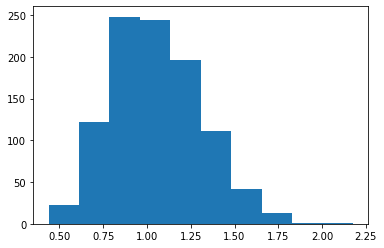

In [34]:
plt.hist(chi1)

In [35]:
print(np.sum(chi1)*32/1000)

33.78157517385976


## Binned fit with generated data

In [36]:
import random
x = np.random.uniform(0.001,1,size=1000)

In [37]:
y=[-math.log(i) for i in x]

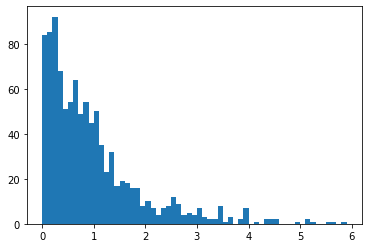

In [38]:
(n,bins,patches)=plt.hist(y,bins=np.arange(0,6,0.1))
plt.show()

In [39]:
print(n,bins,patches)
print(len(bins),len(n))

[84. 85. 92. 68. 51. 54. 64. 49. 54. 45. 50. 35. 23. 32. 17. 19. 18. 16.
 16.  8. 10.  7.  4.  7.  8. 12.  9.  4.  5.  4.  7.  3.  2.  2.  8.  1.
  3.  0.  2.  7.  0.  1.  0.  2.  2.  2.  0.  0.  0.  1.  0.  2.  1.  0.
  0.  1.  1.  0.  1.] [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9] <BarContainer object of 59 artists>
60 59


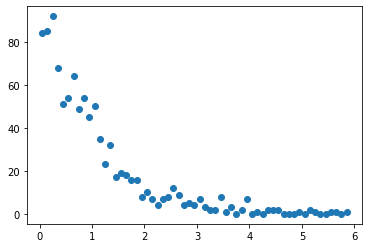

In [40]:
b=[]
r=len(bins)
for i in range(r-1):
    b.append((bins[i]+bins[i+1])/2)
plt.scatter(b,n)

In [41]:
import pandas as pd
data={'x': b, 'y': n}
df=pd.DataFrame(data)
df.to_csv("exp_data.csv")

In [47]:
def nll1(a0,b):
    data = pd.read_csv('exp_data.csv')
    x = (data['x'])
    n = (data['y'])
    #print(x,n)
    r1 = len(n)
    f=0
    for i in range(r1): 
        if(n[i]>0):
          f_i = (a0*math.e**(-b*x[i]) + b*n[i]*x[i] - n[i]*math.log(a0) + n[i]*math.log(n[i]) - n[i])
          f = f + f_i
    print(f,a0,b)
    return f

In [48]:
m = Minuit(nll1,a0=50,b=0.8)
m.limits["a0"]=(50,1000)
m.migrad()  # find minimum
m.hesse()

151.74525663806088 50.00090599031258 0.8
151.74356773958988 50.00112146084118 0.8
151.74676555235504 50.00071348425896 0.8
151.74420309432105 50.00104040168269 0.8
151.74623734717355 50.00078087202981 0.8
151.7676806087517 50.00090599031258 0.80008
151.72284168359752 50.00090599031258 0.7999200000000001
151.80901391581574 50.00090599031258 0.8002273769656832
151.6815721949213 50.00090599031258 0.7997726230343168
151.74420309432105 50.00104040168269 0.8
151.73926060502774 50.00167097798117 0.8
151.7218068871621 50.00389793323113 0.8
151.62578104879472 50.01615458884403 0.8
150.94628937063277 50.10310394320015 0.8
145.4923492372833 50.815378174526515 0.8
118.64314633099096 54.76922113463987 0.8
118.59244518484466 54.77753636921909 0.8
118.693826536294 54.7609131061278 0.8
118.55944972186997 54.782949814745116 0.8
118.72678588981833 54.75551208642201 0.8
118.68639233087389 54.76922113463987 0.8002012363849765
118.59996282198222 54.76922113463987 0.7997987636150236
118.55944972186997 54.78

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 32.21                      │              Nfcn = 74               │
│ EDM = 7.09e-08 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a0   │    99     │     7     │            │            │   50    │  1000   │       │
│ 1 │ b    │   0.98    │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌────┬─────────────────┐
│    │      a0       b │
├────┼─────────────────┤
│ a0 │    42.3  0.2361 │
│  b │  0.2361 0.00246 │
└────┴─────────────────┘

In [49]:
a0_fit = m.values["a0"]
b_fit = m.values["b"]
print(a0_fit,b_fit)

99.04142066019638 0.9771875312517236


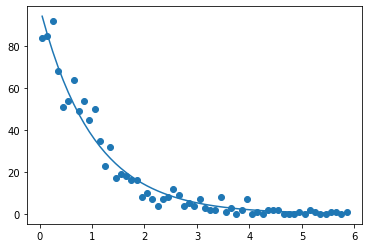

In [56]:
data = pd.read_csv('exp_data.csv')
x1 = np.array(data['x'])
n2 = np.array(data['y'])
r = len(x1)
z = []
def f(t):
    return(a0_fit*exp(-b_fit*t))
for i in range(r):
    z.append(f(x1[i]))
plt.plot(x1,z)
plt.scatter(x1,n2)